In [1]:
from utils.EDA.analysis import *
from utils.EDA.visualize import *

In [2]:
%matplotlib inline

In [3]:
plt.style.use("ggplot")

### Read data

In [4]:
df_train = pd.read_csv("../data/train.csv")
df_test = pd.read_csv("../data/test.csv")

In [5]:
df_train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


### Overview of data

In [6]:
#df_train_info = df_train.info() # int : 35, float : 3, categorical : 43

In [7]:
df_train.describe() 

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Analysis the target

In [8]:
df_train_target_info = df_train["SalePrice"].describe()
df_train_target_info["skew"] = df_train["SalePrice"].skew()
df_train_target_info["kurto"] = df_train["SalePrice"].kurt()
df_train_target_info
# 평균 판매가격은 18만 달러, median : 16만 달러

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
skew          1.882876
kurto         6.536282
Name: SalePrice, dtype: float64

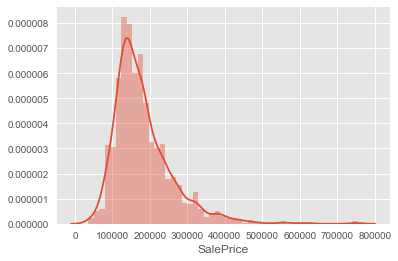

In [9]:
sns.distplot(df_train["SalePrice"], kde = True)

### Analysis the univariance

In [10]:
# categori 처리, numerical 처리
#  numertic -> categoric
nuTocaList = ["MSSubClass", "MoSold", "YrSold", "OverallQual", "OverallCond"]
df_train[nuTocaList] = df_train[nuTocaList].astype("str")

# # categorical -> numeric
# df_train["LotShape"] = df_train["LotShape"].replace({"Reg":3,"IR1":2,"IR2":1,"IR3":0})
# df_train["LandSlope"] = df_train["LandSlope"].replace({"Gtl":2,"Mod":1,"Sev":0})
# df_train["ExterQual"] = df_train["ExterQual"].replace({"Ex":4,"Gd":3,"TA":2,"Fa":1,"Po":0})
# df_train["ExterCond"] = df_train["ExterCond"].replace({"Ex":4,"Gd":3,"TA":2,"Fa":1,"Po":0})
# df_train["HeatingQC"] = df_train["HeatingQC"].replace({"Ex":4,"Gd":3,"TA":2,"Fa":1,"Po":0})

In [11]:
# split datas into quantative and categorical
df_train_quan = extractQuanFromDF(df_train, 'Id', 'SalePrice')
df_train_qual = extractQualFromDF(df_train)

#### Quantiative data

##### non-graphical

In [12]:
df_train_quan.describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
count,1201.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,...,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041
std,24.284752,9981.264932,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,...,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024
min,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,...,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,59.000000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,...,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,69.000000,9478.500000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,...,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,80.000000,11601.500000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,...,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,313.000000,215245.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,...,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000


##### graphical

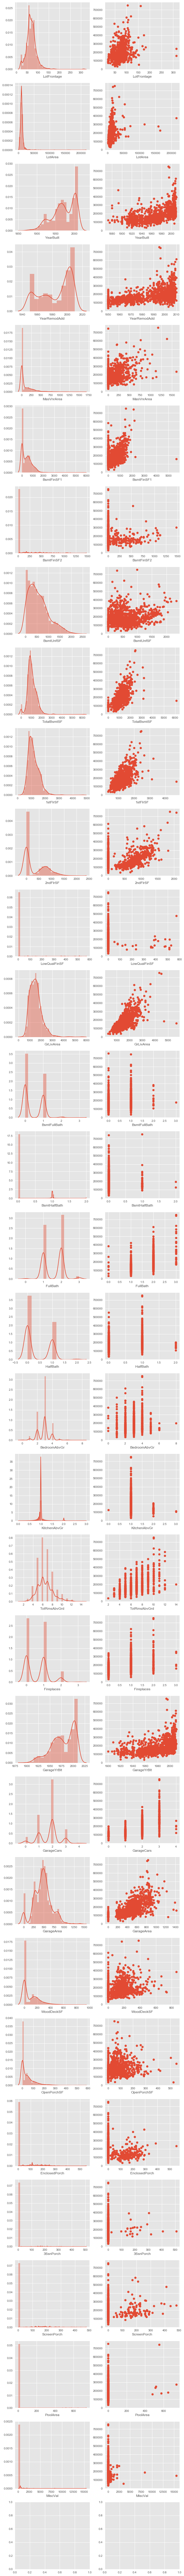

In [13]:
dispQuan(df_train_quan, df_train["SalePrice"])

#### Categorical

##### non-graphical

In [14]:
# 카테고리별 분포도 알아보기
get_ratio_categorical(df_train_qual, "MSSubClass")

,count,ratio
20,536,36.712329
60,299,20.479452
50,144,9.863014
120,87,5.958904
30,69,4.726027
160,63,4.315068
70,60,4.109589
80,58,3.972603
90,52,3.561644
190,30,2.054795


In [15]:
# 각 카테고리의 가장 많은 값과 분포 알아보기
get_max_ratio_categorical(df_train_qual).tail()

,name,max_value,prop,total_num
44,MoSold,6,17.328767,1460
45,YrSold,2009,23.150685,1460
46,SaleType,WD,86.780822,1460
47,SaleCondition,Normal,82.054795,1460
48,count,1,100.000000,1460


##### graphical

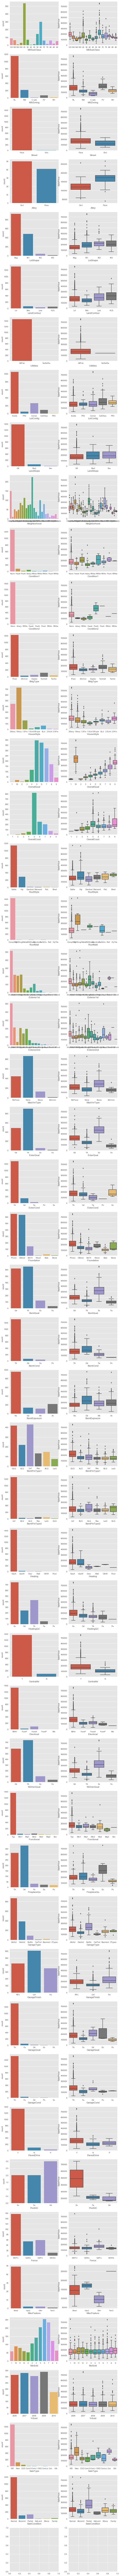

In [16]:
dispQual(df_train_qual, df_train["SalePrice"])

### Analysis the multi-variance

#### Correlation

##### graphical

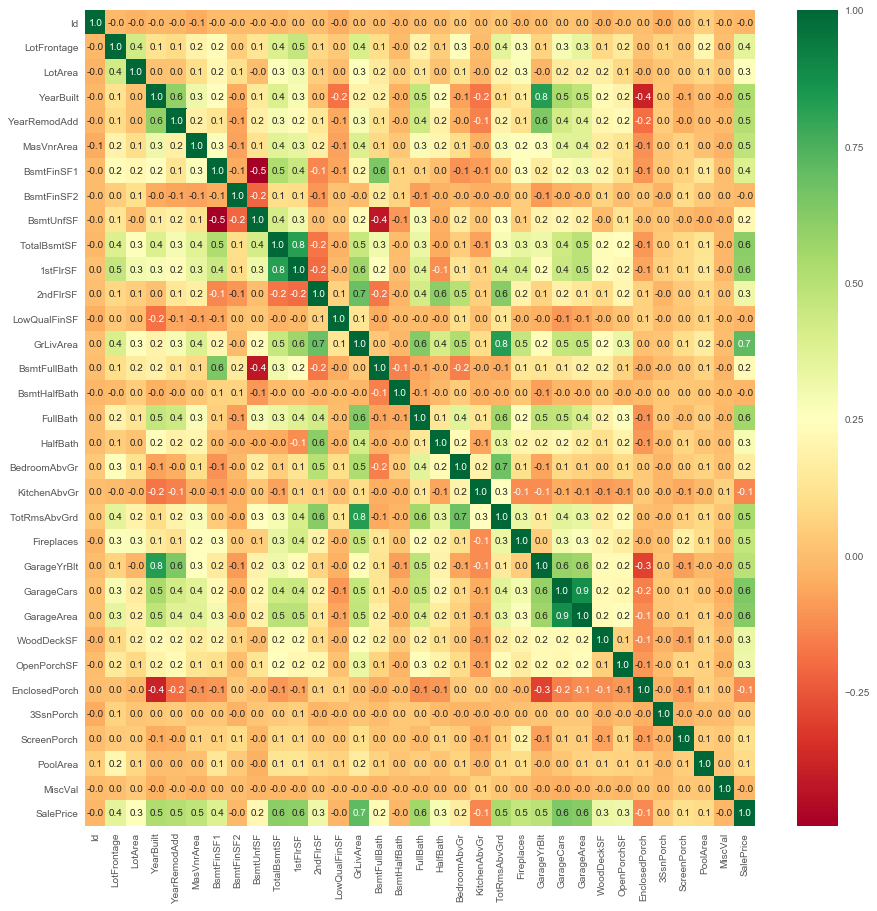

In [17]:
f, ax = plt.subplots(figsize = (15, 15))
data_cor = df_train.corr()
ax = sns.heatmap(data_cor, cmap = "RdYlGn", annot = True, fmt = "1.1f")

##### non-graphical

In [18]:
# SalePrice와 연관이 깊은 목록
get_top_abs_cor(df_train, 20, "MasVnrArea")

SalePrice        0.477493
GrLivArea        0.390857
GarageArea       0.373066
GarageCars       0.364204
TotalBsmtSF      0.363936
1stFlrSF         0.344501
YearBuilt        0.315707
TotRmsAbvGrd     0.280682
FullBath         0.276833
BsmtFinSF1       0.264736
GarageYrBlt      0.252691
Fireplaces       0.249070
HalfBath         0.201444
LotFrontage      0.193458
YearRemodAdd     0.179618
2ndFlrSF         0.174561
WoodDeckSF       0.159718
OpenPorchSF      0.125703
BsmtUnfSF        0.114442
EnclosedPorch    0.110204
Name: MasVnrArea, dtype: float64

In [19]:
# 전체 요소끼리 연관이 깊은 목록
get_top_abs_cor(df_train_quan, 10)

GarageCars    GarageArea      0.882475
YearBuilt     GarageYrBlt     0.825667
GrLivArea     TotRmsAbvGrd    0.825489
TotalBsmtSF   1stFlrSF        0.819530
GrLivArea     SalePrice       0.708624
2ndFlrSF      GrLivArea       0.687501
BedroomAbvGr  TotRmsAbvGrd    0.676620
BsmtFinSF1    BsmtFullBath    0.649212
YearRemodAdd  GarageYrBlt     0.642277
GarageCars    SalePrice       0.640409
dtype: float64